In [1]:
#타이타닉 생존자 예측   ( 참고하기 좋음 https://statkclee.github.io/ml/ml-modeling-titanic.html)  


#파일은 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화
%matplotlib inline

In [4]:
titanic_df = pd.read_csv('titanic/train.csv')

In [5]:
titanic_df.head(3) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
 titanic_df.info()    #Cabin  선실 , Embarked 정박한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#딥러닝, 머신러닝에서는 문자열은 인식을 못하니깐 반드시 값들을 정리해야한다. age랑 Cabin, Embarked 
#dropNa  혹은  fillna 로 비어있는곳을 채우고 혹은 정리한다.

In [7]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)   #inplace는 원본에 값을 엎어쓴다. #데이터의 형태를 보고 각자 판단해서 0값 혹은 평균값

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_df['Sex'].value_counts()   #value_counts로 값을 확인가능

male      577
female    314
Name: Sex, dtype: int64

In [13]:
titanic_df['Cabin'].value_counts() #선실 - 예상했을때 앞의 대문자는 선실등급 

N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
D48              1
C70              1
C49              1
C82              1
A16              1
Name: Cabin, Length: 148, dtype: int64

In [14]:
titanic_df['Embarked'].value_counts() #정박

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [15]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]  #한 글자로만 잘라서 등급을 확인한다.

In [17]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [19]:
titanic_df   
# Survived 생존여부 Pclass 고객 등급  sex,age 는 나이,성별에 따라 생존가능성 높아지고 SibSp : 함께 탑승한 형제 또는 배우자의 수 Parch : 함께 탑승한 부모 또는 자녀의 수
#Fare 티켓 가격 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [23]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()  #0이 사망 1이 생존 

Sex     Survived  Age 
female  0         2.0     4
                  3.0     1
                  6.0     1
                  8.0     1
                  9.0     4
                         ..
male    1         52.0    1
                  56.0    1
                  60.0    1
                  62.0    1
                  80.0    1
Name: Survived, Length: 220, dtype: int64

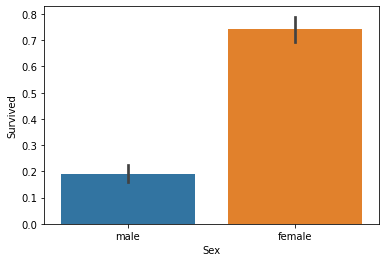

In [26]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)   #sns.barplot 막대차트 

In [29]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()  #0이 사망 1이 생존 

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

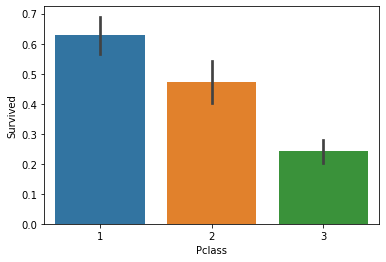

In [31]:
sns.barplot(x='Pclass',y='Survived',data=titanic_df)

In [ ]:
#1. 제일먼저 전처리를 해서 값들을 정리하고, 뭐 이런과정을 거치고 ->반드시 수치화로 해줘야함 
#2. 데이터를 시각화 시킨다.

In [32]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,29.699118,0,0,113510,35.0000,C,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.500000,0,2,230080,26.0000,F,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,29.699118,0,0,19988,30.5000,C,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.000000,1,0,SC/PARIS 2149,13.8583,N,C
